In [87]:
import pandas as pd
import matplotlib.pyplot as plt

from preprocessing_functions import get_cardio_category

In [88]:
# functions
def get_category(score, mean, std):
    if score < mean-0.5*std:
        return "Below average"
    if score > mean+0.5*std:
        return "Above average"
    return "Average"

# TTM
Keep only one TTM stage per user (the last declared)

In [89]:
ttm = pd.read_pickle('data/surveys/ttm.pkl')
ttm.head(50)

,user_id,type,submitdate,stage,ttm_consciousness_raising,ttm_dramatic_relief,ttm_environmental_reevaluation,ttm_self_reevaluation,ttm_social_liberation,ttm_counterconditioning,ttm_helping_relationships,ttm_reinforcement_management,ttm_self_liberation,ttm_stimulus_control
0,621e2e8e67b776a24055b564,ttmspbf,2021-07-26,Maintenance,1.333333,2.666667,2.333333,4.333333,4.000000,4.000000,4.000000,4.000000,4.000000,1.666667
0,621e2eaf67b776a2406b14ac,ttmspbf,2021-11-29,Contemplation,3.333333,2.666667,4.000000,4.666667,4.000000,2.333333,3.000000,4.333333,3.333333,1.000000
1,621e2eaf67b776a2406b14ac,ttmspbf,2022-01-17,Action,3.666667,2.333333,4.333333,4.333333,3.333333,1.666667,3.000000,4.333333,3.333333,3.000000
0,621e2ed667b776a24085d8d1,ttmspbf,2021-06-07,Preparation,1.000000,2.000000,3.000000,3.333333,3.333333,1.000000,1.000000,3.333333,1.666667,1.000000
1,621e2ed667b776a24085d8d1,ttmspbf,2021-07-30,Contemplation,1.666667,2.333333,4.000000,3.333333,3.666667,1.333333,1.000000,2.333333,2.333333,1.666667
0,621e2f3967b776a240c654db,ttmspbf,2021-05-31,Preparation,2.000000,2.000000,2.666667,4.000000,5.000000,2.333333,2.000000,3.000000,2.333333,2.000000
0,621e2f6167b776a240e082a9,ttmspbf,2021-06-01,Contemplation,3.000000,4.666667,3.000000,5.000000,2.666667,2.000000,2.333333,4.666667,4.666667,4.000000
1,621e2f6167b776a240e082a9,ttmspbf,2021-08-02,Maintenance,2.000000,3.666667,2.666667,5.000000,2.333333,2.333333,2.333333,4.333333,4.666667,3.666667
0,621e2f7a67b776a240f14425,ttmspbf,2021-05-31,Maintenance,2.333333,1.333333,1.333333,4.333333,2.333333,3.000000,1.666667,4.666667,3.333333,2.333333
1,621e2f7a67b776a240f14425,ttmspbf,2021-07-30,Maintenance,1.666667,1.666667,2.666667,5.000000,2.333333,3.666667,1.000000,4.333333,3.000000,2.000000


In [90]:
ttm.value_counts()

user_id                   type     submitdate  stage             ttm_consciousness_raising  ttm_dramatic_relief  ttm_environmental_reevaluation  ttm_self_reevaluation  ttm_social_liberation  ttm_counterconditioning  ttm_helping_relationships  ttm_reinforcement_management  ttm_self_liberation  ttm_stimulus_control
621e2e8e67b776a24055b564  ttmspbf  2021-07-26  Maintenance       1.333333                   2.666667             2.333333                        4.333333               4.000000               4.000000                 4.000000                   4.000000                      4.000000             1.666667                1
621e337667b776a240ce78ab  ttmspbf  2021-06-07  Contemplation     1.000000                   3.000000             4.000000                        3.666667               3.333333               1.000000                 1.333333                   2.333333                      2.333333             2.000000                1
621e33ed67b776a2401cf5f7  ttmspbf  2021-06-03

In [91]:
ttm = ttm.sort_values(by=['user_id', 'submitdate']).drop_duplicates(subset=["user_id"], keep="last")
ttm.head(100)

,user_id,type,submitdate,stage,ttm_consciousness_raising,ttm_dramatic_relief,ttm_environmental_reevaluation,ttm_self_reevaluation,ttm_social_liberation,ttm_counterconditioning,ttm_helping_relationships,ttm_reinforcement_management,ttm_self_liberation,ttm_stimulus_control
0,621e2e8e67b776a24055b564,ttmspbf,2021-07-26,Maintenance,1.333333,2.666667,2.333333,4.333333,4.000000,4.000000,4.000000,4.000000,4.000000,1.666667
1,621e2eaf67b776a2406b14ac,ttmspbf,2022-01-17,Action,3.666667,2.333333,4.333333,4.333333,3.333333,1.666667,3.000000,4.333333,3.333333,3.000000
1,621e2ed667b776a24085d8d1,ttmspbf,2021-07-30,Contemplation,1.666667,2.333333,4.000000,3.333333,3.666667,1.333333,1.000000,2.333333,2.333333,1.666667
0,621e2f3967b776a240c654db,ttmspbf,2021-05-31,Preparation,2.000000,2.000000,2.666667,4.000000,5.000000,2.333333,2.000000,3.000000,2.333333,2.000000
1,621e2f6167b776a240e082a9,ttmspbf,2021-08-02,Maintenance,2.000000,3.666667,2.666667,5.000000,2.333333,2.333333,2.333333,4.333333,4.666667,3.666667
1,621e2f7a67b776a240f14425,ttmspbf,2021-07-30,Maintenance,1.666667,1.666667,2.666667,5.000000,2.333333,3.666667,1.000000,4.333333,3.000000,2.000000
1,621e2f9167b776a240011ccb,ttmspbf,2022-01-19,Preparation,4.000000,3.000000,2.000000,4.666667,3.000000,1.666667,1.666667,4.666667,4.000000,4.333333
1,621e2fb367b776a24015accd,ttmspbf,2021-07-26,Action,1.666667,2.000000,2.666667,4.000000,3.666667,3.666667,4.000000,4.000000,3.666667,3.000000
1,621e2fce67b776a240279baa,ttmspbf,2021-07-26,Contemplation,2.000000,2.666667,2.333333,4.000000,4.000000,1.333333,2.333333,3.666667,2.000000,2.333333
1,621e2ff067b776a2403eb737,ttmspbf,2022-01-17,Preparation,1.000000,2.333333,4.000000,3.666667,3.666667,2.000000,3.000000,3.666667,3.666667,1.666667


In [92]:
ttm = ttm[['user_id', 'submitdate', 'stage']]
ttm = ttm.sort_values(by='submitdate', ascending=True).reset_index()
ttm = ttm.drop(columns='index')
ttm

,user_id,submitdate,stage
0,621e314867b776a24029ebf9,2021-05-31,Preparation
1,621e36c267b776a240ba2756,2021-05-31,Action
2,621e328667b776a240281372,2021-05-31,Maintenance
3,621e2f3967b776a240c654db,2021-05-31,Preparation
4,621e32d967b776a240627414,2021-05-31,Maintenance
5,621e34ec67b776a240d60873,2021-06-02,Maintenance
6,621e332267b776a24092a584,2021-06-02,Maintenance
7,621e326767b776a24012e179,2021-06-07,Maintenance
8,621e375b67b776a240290cdc,2021-06-08,Action
9,621e34db67b776a240c9c2be,2021-06-09,Preparation


In [93]:
ttm = ttm.rename({'user_id':'id','submitdate': 'date'}, axis=1)  
ttm['date'] = pd.to_datetime(ttm['date'].astype("str"), format='%Y-%m-%d')

In [94]:
ttm.to_pickle('data/surveys/ttm_classification.pkl')

# PANAS
Calculate below average-average-beyond average classes for PANAS

In [7]:
panas = pd.read_pickle('data/surveys/panas.pkl')
panas.head(100)

,user_id,type,submitdate,positive_affect_score,negative_affect_score
1,621e2e8e67b776a24055b564,panas,2021-07-26,37,14
2,621e2e8e67b776a24055b564,panas,2021-05-31,38,12
3,621e2e8e67b776a24055b564,panas,2021-06-07,37,12
4,621e2e8e67b776a24055b564,panas,2021-06-28,31,12
5,621e2e8e67b776a24055b564,panas,2021-07-19,37,12
...,...,...,...,...,...
5,621e30e267b776a240e5bf90,panas,2021-12-28,37,19
6,621e30e267b776a240e5bf90,panas,2022-01-03,27,17
7,621e30e267b776a240e5bf90,panas,2022-01-10,27,16
0,621e30e467b776a240e817c7,panas,2021-07-31,30,21


In [8]:
mean_panas = panas['negative_affect_score'].mean()
std_panas = panas['negative_affect_score'].std()
panas['negative_affect_category'] = panas['negative_affect_score'].apply(lambda score: get_category(score, mean_panas, std_panas))
print("Mean PANAS: {} - STD PANAS: {}".format(mean_panas, std_panas))
panas.head(100)

Mean PANAS: 21.23507462686567 - STD PANAS: 7.552609564274128


,user_id,type,submitdate,positive_affect_score,negative_affect_score,negative_affect_category
1,621e2e8e67b776a24055b564,panas,2021-07-26,37,14,Below average
2,621e2e8e67b776a24055b564,panas,2021-05-31,38,12,Below average
3,621e2e8e67b776a24055b564,panas,2021-06-07,37,12,Below average
4,621e2e8e67b776a24055b564,panas,2021-06-28,31,12,Below average
5,621e2e8e67b776a24055b564,panas,2021-07-19,37,12,Below average
...,...,...,...,...,...,...
5,621e30e267b776a240e5bf90,panas,2021-12-28,37,19,Average
6,621e30e267b776a240e5bf90,panas,2022-01-03,27,17,Below average
7,621e30e267b776a240e5bf90,panas,2022-01-10,27,16,Below average
0,621e30e467b776a240e817c7,panas,2021-07-31,30,21,Average


(array([102.,   0.,   0.,   0.,   0.,  76.,   0.,   0.,   0.,  90.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

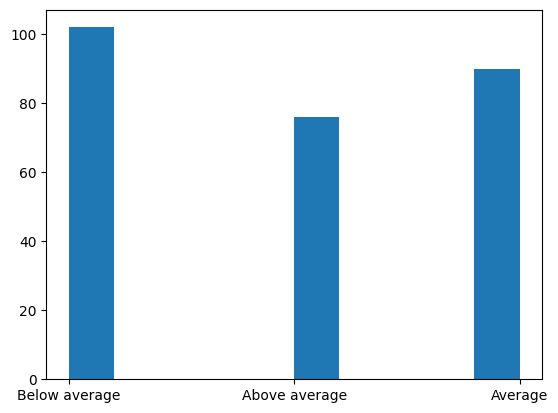

In [9]:
plt.hist(panas.negative_affect_category)

In [10]:
panas[['user_id', 'submitdate', 'negative_affect_category']].to_pickle('data/surveys/panas_classification.pkl')

# VO2Max
Convert VO2Max to fitness level

In [106]:
df = pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
df.head()

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19


In [107]:
# keep only necessary columns
#df = df[['id', 'date', 'filteredDemographicVO2Max', 'gender', 'age']]
#df.head()

In [108]:
df['age'].value_counts()

<30     3710
>=30    3154
Name: age, dtype: int64

In [109]:
df['fitness_level'] = df.apply(lambda row: get_cardio_category(row["gender"], row['age'], row["filteredDemographicVO2Max"]), axis=1)
df.fitness_level.astype(str)
df.head(100)

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,fitness_level
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19,Superior/Excellent
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,1.197531,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19,Superior/Excellent
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,1.670732,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19,Superior/Excellent
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,1.588235,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19,Superior/Excellent
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,1.090909,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19,Superior/Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,621e2eaf67b776a2406b14ac,2021-11-20,34.445559,81.610,10.854,NaN,15.6,82.0,0.833333,0.900,...,1.062500,43112.0,574.0,855.0,11.0,0.0,>=30,FEMALE,<19,Superior/Excellent
96,621e2eaf67b776a2406b14ac,2021-11-21,34.620595,70.957,25.925,NaN,15.6,74.0,0.533333,0.775,...,0.259259,25177.0,304.0,1131.0,5.0,0.0,>=30,FEMALE,<19,Superior/Excellent
97,621e2eaf67b776a2406b14ac,2021-11-22,34.321482,68.986,28.020,NaN,14.8,83.0,0.800000,0.775,...,1.153846,14766.0,263.0,1009.0,4.0,0.0,>=30,FEMALE,<19,Superior/Excellent
98,621e2eaf67b776a2406b14ac,2021-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6930.0,140.0,482.0,15.0,0.0,>=30,FEMALE,<19,Superior/Excellent


In [110]:
df['fitness_level'].value_counts()

Poor                  2930
Superior/Excellent    2159
Fair/Good             2019
Name: fitness_level, dtype: int64

In [111]:
df[['id', 'fitness_level']].value_counts()

id                        fitness_level     
621e301e67b776a240608a72  Superior/Excellent    228
621e342e67b776a2404ce460  Fair/Good             206
621e32d967b776a240627414  Poor                  162
621e2f1b67b776a240b3d87c  Poor                  159
621e367e67b776a24087d75d  Fair/Good             136
                                               ... 
                          Superior/Excellent      3
621e2eaf67b776a2406b14ac  Poor                    2
621e2f3967b776a240c654db  Poor                    2
621e34f767b776a240de4e1a  Fair/Good               1
621e2e8e67b776a24055b564  Poor                    1
Length: 140, dtype: int64

In [112]:
df.to_pickle('data/vo2max_classification.pkl')